# Project: TMDB-Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I am going to analyze TMDB-Movies Dataset. I will use the example question that have been provided in Investigate a Dataset Project and my own questions.
We will see:
<ul>
<li>What is the highest revenue?</li>
<li>What is the highest popularity?</li>
<li>What is the biggest amount of budget?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
</ul>

Here I try to install all libraries needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

### General Properties

Here, I will read the dataset and print it out.

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


As we can see here there are 9 coulmns with missing data with string data type.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Now I will check if there is a duplicated data.

In [4]:
sum(df.duplicated())

1

I used describe() method in order to understand more my dataset.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

I will sovle missing data problem by entring a standard value for all columns that have missing values.

In [6]:
df.fillna({'imdb_id':0,'cast':'Not provided','homepage':'Not provided','director':'Not provided','tagline':'Not provided','keywords':'Not provided','overview':'Not provided','genres':'Not provided','production_companies':'Not provided'},inplace=True)

Now I will delete all duplicated values.

In [7]:
df.drop_duplicates(inplace=True)

Now, I am trying to use my own function in order to edit release_date to contain only the date and month.

In [8]:
def Editcolumn(x):
    e=x[0:len(x)-3];
    return e;

In [9]:
df['release_date']=df['release_date'].apply(Editcolumn);

## Exploratory Data Analysis

Here is the hist of the dataset.

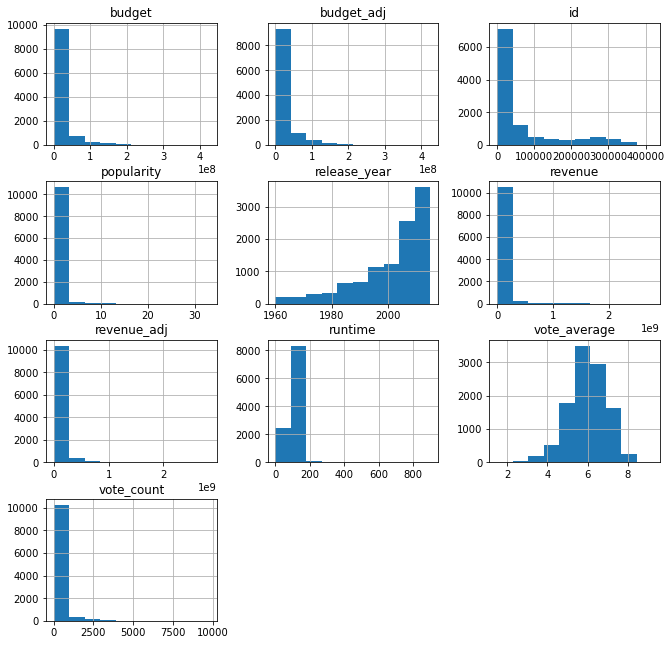

In [10]:
df.hist(figsize=(11,11));

### Research Question 1 

What is the highest revenue?

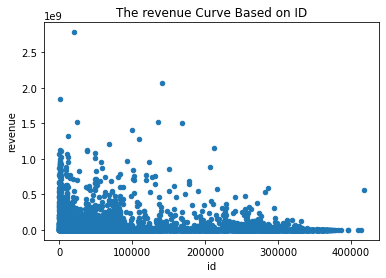

In [11]:
df.plot(x='id',y='revenue',kind='scatter');
plt.title('The revenue Curve Based on ID');

### Research Question 2

 What is the highest popularity?

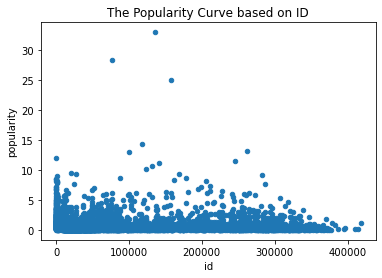

In [12]:
df.plot(x='id',y='popularity',kind='scatter');
plt.title('The Popularity Curve based on ID');

### Research Question 3

What is the biggest amount of budget?

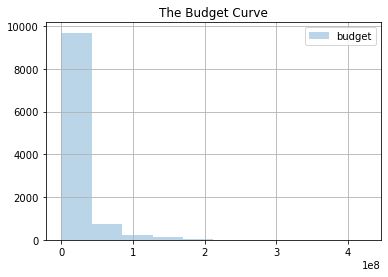

In [13]:
df['budget'].hist(alpha=0.3, label='budget')
plt.legend();
plt.title('The Budget Curve');

### Research Question 4

What kinds of properties are associated with movies that have high revenues? 

They will be popularity and vote_count.

As we can see there is a relationship between revenue and popularity

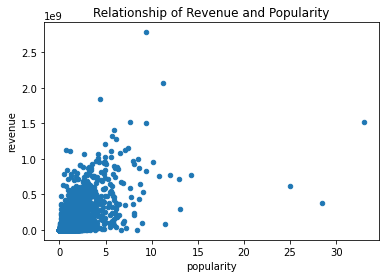

In [14]:
df.plot(x='popularity',y='revenue',kind='scatter');
plt.title('Relationship of Revenue and Popularity');

Also, we can see the relationship between revenue and vote_count.

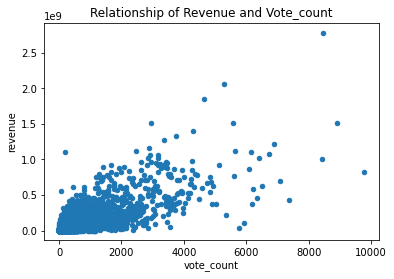

In [15]:
df.plot(x='vote_count',y='revenue',kind='scatter');
plt.title('Relationship of Revenue and Vote_count');

## Conclusions

I will try to find exactly the maximum revenue which will be 2781505847 $

In [16]:
df['revenue'][df['revenue'].idxmax()]

2781505847

Also, I will try to find exactly the maximum popularity which will be 32.985763.

In [17]:
df['popularity'][df['popularity'].idxmax()]

32.985763

Also, I will try to find exactly the maximum budget which will be 425000000 $

In [18]:
df['budget'][df['budget'].idxmax()]

425000000

Here I am finding the correlation between popularity with revenue which as shown it is a positive correlation and vote_count with revenue which is also a positive correlation. 

It make  a sense that if a certain movie become more popular that will lead more people to watch it and this will be a reason of high revenue. Also, if certain movie has more vote counts that mean more people like it and will watch it and that finally will lead to high revenue.

In [19]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


At the end, There were some missing data such as homepage and cast but fortunately I did not need them for the analysis. All data provided here are sufficient to find all result I want and need such as revenue and budget and others.

Done by Amal Alsubaie